# Homework 3
Michael Eng

In [1]:
import numpy as np
import scipy.io as io

hw3_1 = io.loadmat("hw3.mat")['hw3_1']
hw3_2_1 = io.loadmat("hw3.mat")['hw3_2_1']
hw3_2_2 = io.loadmat("hw3.mat")['hw3_2_1']

In [2]:
print(hw3_1[:,:5])

[[-0.07280088  1.05258506  0.98835463  1.88607911  0.64503959]
 [-0.99430985  0.42878377 -0.59901663 -0.21997506 -1.30991937]]


## Problem 1

In [3]:
from scipy.stats import norm

rho = 0.5

n = int(hw3_1.shape[1] / 2)
p1x = hw3_1.T[:n]
p2x = hw3_1.T[n:]

labels = np.append([1 for _ in range(n)], [2 for _ in range(n)])
print(labels)


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [4]:
def get_mu(x):
    return np.sum(x, axis=0) / n

def get_sigma(x, u):
    diff = np.subtract(x, np.reshape(u, (1, u.shape[0])))
    return np.dot(diff.T, diff) / n

def update_params(l, x):
    p1x = []
    p2x = []
        
    for i, xi in enumerate(x.T):
        if l[i] == 1:
            p1x.append(xi)
        else:
            p2x.append(xi)
    p1x = np.array(p1x)
    p2x = np.array(p2x)
    
    u1 = get_mu(p1x)
    u2 = get_mu(p2x)

    sig1 = get_sigma(p1x, u1)
    sig2 = get_sigma(p2x, u2)
    return l, p1x, p2x, u1, u2, sig1, sig2

def get_likelihood(x, u, cov):
    w1 = norm.pdf(x[:,0], u[0], cov[0,0])
    w2 = norm.pdf(x[:,1], u[1], cov[1,1])
    return np.array([w1, w2])

def update_labels(l, p1x, p2x, u1, u2, sig1, sig2):
    likelihood11 = get_likelihood(p1x, u1, sig1)
    likelihood12 = get_likelihood(p1x, u2, sig2)
    likelihood21 = get_likelihood(p2x, u1, sig1)
    likelihood22 = get_likelihood(p2x, u2, sig2)
    
    lnew = []
    
    x_y = 0
    
    for i in range(p1x.shape[0]):
        if likelihood11[x_y,i] > likelihood12[x_y,i]:
            lnew.append(1)
        else:
            lnew.append(2)
            
    for i in range(p2x.shape[0]):
        if likelihood21[x_y,i] > likelihood22[x_y,i]:
            lnew.append(1)
        else:
            lnew.append(2)
    return np.array(lnew)


In [5]:
import matplotlib.pyplot as plt

def plot_likelihoods(u1, u2, sig1, sig2):
    x_plot = np.arange(-10,10,0.01)
    pxw11 = norm.pdf(x_plot, u1[0], sig1[0,0])
    pxw12 = norm.pdf(x_plot, u1[1], sig1[1,1])
    pxw21 = norm.pdf(x_plot, u2[0], sig2[0,0])
    pxw22 = norm.pdf(x_plot, u2[1], sig2[1,1])
    plt.title('Likelihood plot for classes w')
    plt.ylabel('Probability')
    plt.xlabel('x')
    plt.plot(x_plot, pxw11, 'r', label='w1x')
    plt.plot(x_plot, pxw12, 'r', label='w1y')
    plt.plot(x_plot, pxw21, 'g', label='w2x')
    plt.plot(x_plot, pxw22, 'g', label='w2y')
    plt.legend()
    plt.show()

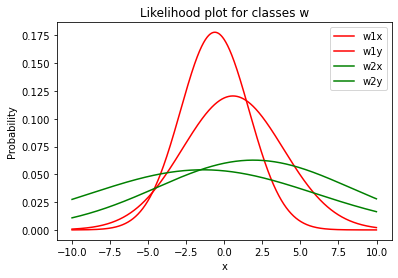

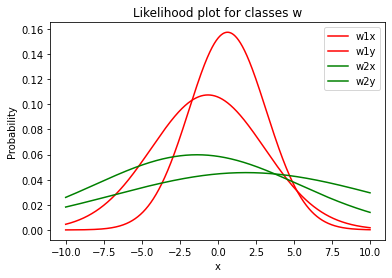

[ 0.63042544 -0.65445921]
[[ 2.53429462 -1.91425352]
 [-1.91425352  3.71149791]]


In [6]:
# start with a 50%-50% split of x and find params
u1 = get_mu(p1x)
u2 = get_mu(p2x)

sig1 = get_sigma(p1x, u1)
sig2 = get_sigma(p2x, u2)


labels = update_labels(labels, p1x, p2x, u1, u2, sig1, sig2)

plot_likelihoods(u1, u2, sig1, sig2)

# use the new labels and x to update the params and labels again.
for _ in range(5):
    labels, p1x, p2x, u1, u2, sig1, sig2 = update_params(labels, hw3_1)
    labels = update_labels(labels, p1x, p2x, u1, u2, sig1, sig2)
plot_likelihoods(u1, u2, sig1, sig2)
print(u1)
print(sig1)


## Problem 2.1

In [18]:
import math

def get_px(xi, hn=0.2):
    n = xi.shape[0]
    density = []
    for i in range(-40, 80):
        i = i / 10.0
        for j in range(-40, 80):
            j = j / 10.0
            differences = np.zeros((100,2))
            differences += np.array([i,j])
            differences -= xi
            differences = (1 / (0.2 * np.sqrt(2 * math.pi))) * np.exp(-0.5 * (differences/hn)**2)
            density.append(np.sum(differences))
    return np.array(density)            

In [28]:
import matplotlib.pyplot as plt

def plot_density(d):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    rang = [i / 10.0 for i in range(-40, 80)]
    ax.plot_surface(rang, rang, d, alpha=0.5)
    plt.show()

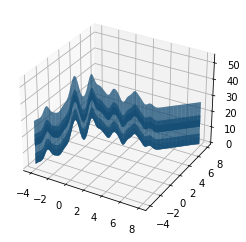

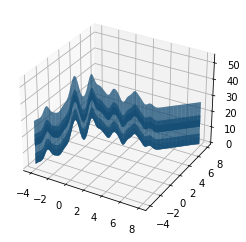

In [33]:
density1 = get_px(np.array(hw3_2_1.T))
density2 = get_px(np.array(hw3_2_2.T))
n1 = int(np.sqrt(density1.shape))
n2 = int(np.sqrt(density1.shape))

density1 = np.reshape(density1, (n1,n1))
density2 = np.reshape(density2, (n2,n2))

plot_density(density1)
plot_density(density2)


## Problem 2.2